In [1]:
from sklearn.datasets import load_iris #import the iris dataset
iris_data = load_iris()

In [2]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
features = iris_data.data #get the features of the dataset
labels = iris_data.target #get the labels of the dataset

In [4]:
from sklearn.preprocessing import MinMaxScaler #import the MinMaxScaler for scaling the features
features = MinMaxScaler().fit_transform(features)

In [5]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals #import the algorithm_globals for setting the random seed
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
) 

C:\Users\Asus\AppData\Local\Temp\ipykernel_17748\282151373.py:3: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  algorithm_globals.random_seed = 123
C:\Users\Asus\AppData\Local\Temp\ipykernel_17748\282151373.py:5: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_alg

C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


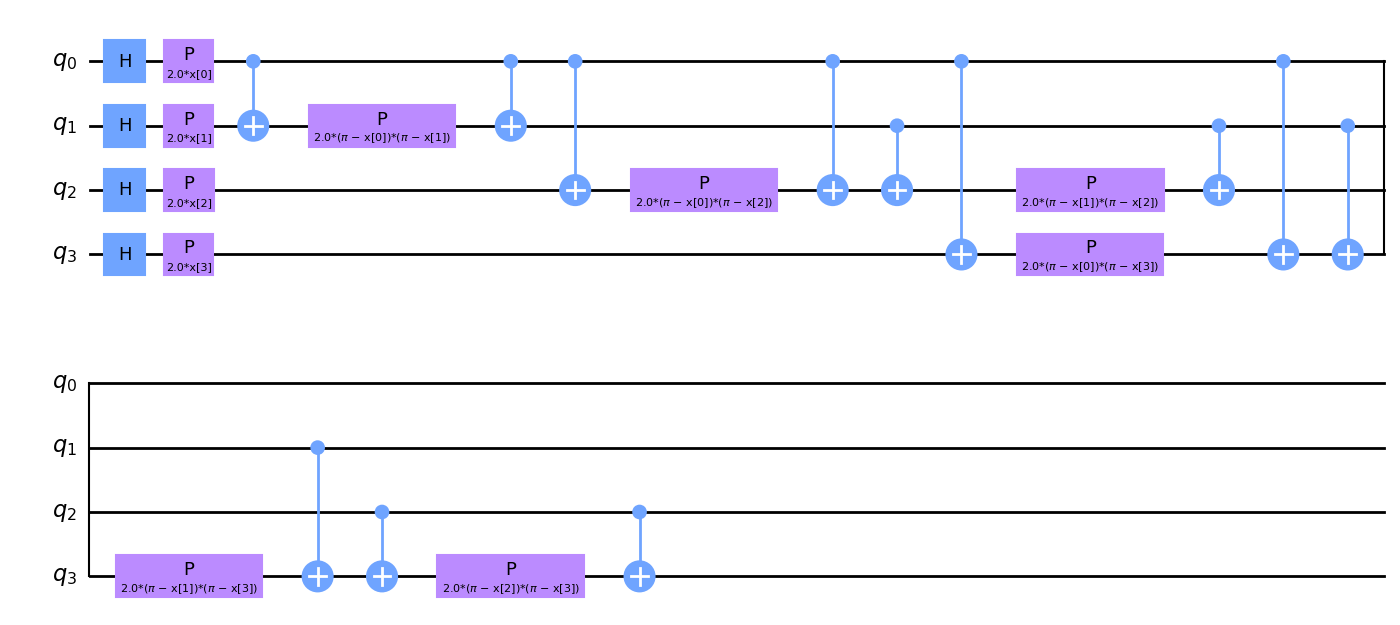

In [6]:
from qiskit.circuit.library import ZZFeatureMap
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1) # create the feature map for the quantum model
feature_map.decompose().draw(output="mpl", fold=20)

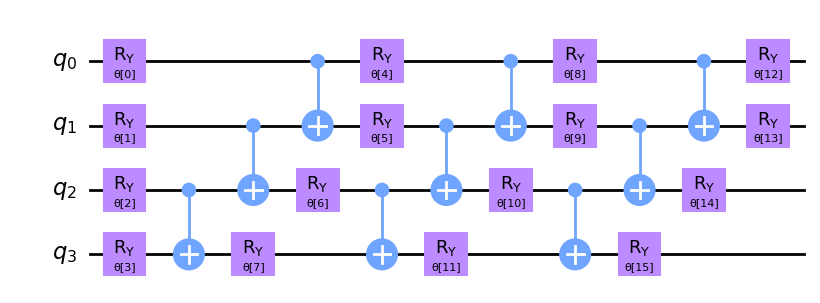

In [7]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=3) #create the ansatz for the quantum model (RealAmplitudes ansatz with 3 repetitions, the number of qubits equal to the number of features)
ansatz.decompose().draw(output="mpl", fold=20)

In [8]:
from qiskit.algorithms.optimizers import AQGD
optimizer = AQGD(maxiter=100) #create the AQGD optimizer for the quantum model (with 100 iterations)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17748\831372878.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import AQGD


In [9]:
from qiskit.primitives import Sampler
sampler = Sampler() #create the sampler (Qiskit Aer Statevector Simulator) for the quantum model

In [10]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
objective_func_vals = [] #create a list to store the objective function values
plt.rcParams["figure.figsize"] = (12, 6)
def callback_graph(weights, obj_func_eval):  #define the callback function for the quantum model 
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

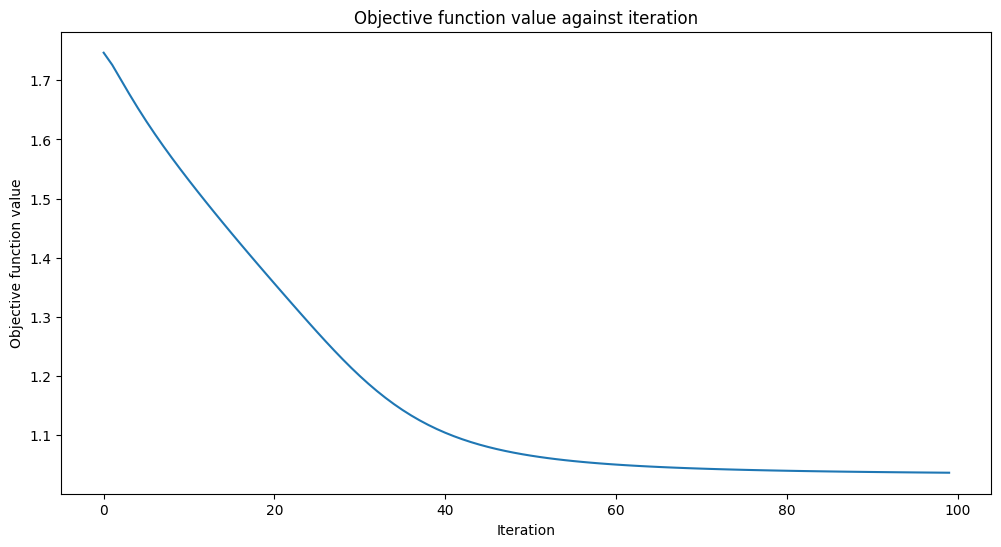

Training time: 2859 seconds


In [11]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC( #use the VQC classifier
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)
objective_func_vals = [] #clear objective value history
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [12]:
train_score_VQC = vqc.score(train_features, train_labels)
test_score_VQC = vqc.score(test_features, test_labels)
print(f"Quantum VQC on the training dataset: {train_score_VQC:.2f}") #print the scores of the quantum model
print(f"Quantum VQC on the test dataset:     {test_score_VQC:.2f}")

Quantum VQC on the training dataset: 0.85
Quantum VQC on the test dataset:     0.83
